# Hito 1

# Preliminares

Lo que desea la escuela es generar un modelo que identifique a los alumnos con bajo desempeño académico según el promedio final. G3 es el promedio final y se menciona que es de 0 a 20 por lo que es un problema de regreción.

Para medir el desempeño se generaran nuevas predicciones en la muestra de prueba.


# Aspectos computacionales
pandas: Es una herramienta para analizar y manipular datos.

numpy: Es una herramienta que proporciona un objeto de matriz multidimensional y varias operaciones para matrices.

pyplot: Crea figuras, trazados, lineas, etc. En general tiene funciones para graficar

seaborn: Es una libreria de visualización de datos.

linear_model: Contiene funciones destinados a la regresión en los que se espera que el valor sea una combinación lineal de las características.

mean_squared_error: Muestra la perdida del error cuadrático medio.

r2_score: Muestra R-cuadrado

train_test_split: Divide arreglos o matrices en subconjuntos aleatorios de entrenamiento y test.

# Datos:
En el inicio se pone el delimitador y se borra la columna 'Unnamed: 0'. En el enunciado se avisa que los datos nulos son 'nulidade', 'sem validade' y 'zero', por lo que se procede a eliminar los datos de estas celdas y posteriormente se hace un dropna, ya que estos quedan vacios. Para la transformación de string a enteros se puede notar que el string esta en la forma '\"17\"', por lo que inicialmente se sacan las comillas y luego se transforman en enteros.

Para recodificar las variables binarias, se se utiliza where de numpy que gracias a su condicional, se puede transformar los binarios en 1 o 0.

Luego para recodificar los nominales, se utiliza loc de pandas, por su propiedad de crear una columna siguiendo ciertas condiciones.

Para separar los datos de entrenamiento con los de testeo se separan las columnas a analizar y se usa la función train_test_split. Luego se genera un objeto que contenga las instrucciones a ejecutar, por lo que se usará linear_model, posteriormente se puede inicializar la clase con el metodo fit y los datos de entrenamiento. Para generar las predicciones se utiliza la función predict. Finalmente se hace una comparación con el vector de prueba y el objetivo, para eso se utilizan el promedio del error cuadratico y R-cuadrado para analizar el comportamiento del modelo.

In [28]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv("students.csv", delimiter='|')
df=df.drop(['Unnamed: 0'],axis=1)

df=df.where(df!='nulidade')
df=df.where(df!='sem validade')
df=df.where(df!='zero')
perdida= df.isna().sum()
df=df.dropna()


df['age']=df['age'].str.replace(r'\"', '').astype(int)
df['goout']=df['goout'].str.replace(r'\"', '').astype(int)
df['health']=df['health'].str.replace(r'\"', '').astype(int)

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [30]:
df['schoolbin']=np.where(df['school']=='GP',1,0)
df=df.drop(['school'],axis=1)

df['sexbin']=np.where(df['sex']=='F',1,0)
df=df.drop(['sex'],axis=1)

df['addressbin']=np.where(df['address']=='U',1,0)
df=df.drop(['address'],axis=1)

df['famsizebin']=np.where(df['famsize']=='LE3',1,0)
df=df.drop(['famsize'],axis=1)

df['Pstatusbin']=np.where(df['Pstatus']=='T',1,0)
df=df.drop(['Pstatus'],axis=1)

df['schoolsupbin']=np.where(df['schoolsup']=='yes',1,0)
df=df.drop(['schoolsup'],axis=1)

df['famsupbin']=np.where(df['famsup']=='yes',1,0)
df=df.drop(['famsup'],axis=1)

df['paidbin']=np.where(df['paid']=='yes',1,0)
df=df.drop(['paid'],axis=1)

df['activitiesbin']=np.where(df['activities']=='yes',1,0)
df=df.drop(['activities'],axis=1)

df['nurserybin']=np.where(df['nursery']=='yes',1,0)
df=df.drop(['nursery'],axis=1)

df['higherbin']=np.where(df['higher']=='no',1,0)
df=df.drop(['higher'],axis=1)

df['internetbin']=np.where(df['internet']=='yes',1,0)
df=df.drop(['internet'],axis=1)

df['romanticbin']=np.where(df['romantic']=='no',1,0)
df=df.drop(['romantic'],axis=1)

df

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,...,famsizebin,Pstatusbin,schoolsupbin,famsupbin,paidbin,activitiesbin,nurserybin,higherbin,internetbin,romanticbin
1,17,1,1,at_home,other,course,father,1,2,0,...,0,1,0,1,0,0,0,0,1,1
3,15,4,2,health,services,home,mother,1,3,0,...,0,1,0,1,1,1,1,0,1,0
5,16,4,3,services,other,reputation,mother,1,2,0,...,1,1,0,1,1,1,1,0,1,1
6,16,2,2,other,other,home,mother,1,2,0,...,1,1,0,0,0,0,1,0,1,1
7,17,4,4,other,teacher,home,mother,2,2,0,...,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,services,services,course,other,1,2,2,...,1,0,0,1,1,0,1,0,0,1
391,17,3,1,services,services,course,mother,2,1,0,...,1,1,0,0,0,0,0,0,1,1
392,21,1,1,other,other,course,other,1,1,3,...,0,1,0,0,0,0,0,0,0,1
393,18,3,2,services,other,course,mother,3,1,0,...,1,1,0,0,0,0,0,0,1,1


In [31]:
#teacher = 1
#health= 2
#services=3
#at_home=4
#other=5

df.loc[(df['Mjob']=="teacher"), 'Mjobbin'] = 1
df.loc[(df['Mjob']=="health"), 'Mjobbin'] = 2
df.loc[(df['Mjob']=="services"), 'Mjobbin'] = 3
df.loc[(df['Mjob']=="at_home"), 'Mjobbin'] = 4
df.loc[(df['Mjob']=="other"), 'Mjobbin'] = 5

df=df.drop(['Mjob'],axis=1)
df

,age,Medu,Fedu,Fjob,reason,guardian,traveltime,studytime,failures,famrel,...,Pstatusbin,schoolsupbin,famsupbin,paidbin,activitiesbin,nurserybin,higherbin,internetbin,romanticbin,Mjobbin
1,17,1,1,other,course,father,1,2,0,5,...,1,0,1,0,0,0,0,1,1,4.0
3,15,4,2,services,home,mother,1,3,0,3,...,1,0,1,1,1,1,0,1,0,2.0
5,16,4,3,other,reputation,mother,1,2,0,5,...,1,0,1,1,1,1,0,1,1,3.0
6,16,2,2,other,home,mother,1,2,0,4,...,1,0,0,0,0,1,0,1,1,5.0
7,17,4,4,teacher,home,mother,2,2,0,4,...,0,1,1,0,0,1,0,0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,services,course,other,1,2,2,5,...,0,0,1,1,0,1,0,0,1,3.0
391,17,3,1,services,course,mother,2,1,0,2,...,1,0,0,0,0,0,0,1,1,3.0
392,21,1,1,other,course,other,1,1,3,5,...,1,0,0,0,0,0,0,0,1,5.0
393,18,3,2,other,course,mother,3,1,0,4,...,1,0,0,0,0,0,0,1,1,3.0


In [32]:
#teacher = 1
#health= 2
#services=3
#at_home=4
#other=5

df.loc[(df['Fjob']=="teacher"), 'jobbin'] = 1
df.loc[(df['Fjob']=="health"), 'jobbin'] = 2
df.loc[(df['Fjob']=="services"), 'jobbin'] = 3
df.loc[(df['Fjob']=="at_home"), 'jobbin'] = 4
df.loc[(df['Fjob']=="other"), 'jobbin'] = 5

df=df.drop(['Fjob'],axis=1)
df

,age,Medu,Fedu,reason,guardian,traveltime,studytime,failures,famrel,freetime,...,schoolsupbin,famsupbin,paidbin,activitiesbin,nurserybin,higherbin,internetbin,romanticbin,Mjobbin,jobbin
1,17,1,1,course,father,1,2,0,5,3,...,0,1,0,0,0,0,1,1,4.0,5.0
3,15,4,2,home,mother,1,3,0,3,2,...,0,1,1,1,1,0,1,0,2.0,3.0
5,16,4,3,reputation,mother,1,2,0,5,4,...,0,1,1,1,1,0,1,1,3.0,5.0
6,16,2,2,home,mother,1,2,0,4,4,...,0,0,0,0,1,0,1,1,5.0,5.0
7,17,4,4,home,mother,2,2,0,4,1,...,1,1,0,0,1,0,0,1,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,course,other,1,2,2,5,5,...,0,1,1,0,1,0,0,1,3.0,3.0
391,17,3,1,course,mother,2,1,0,2,4,...,0,0,0,0,0,0,1,1,3.0,3.0
392,21,1,1,course,other,1,1,3,5,5,...,0,0,0,0,0,0,0,1,5.0,5.0
393,18,3,2,course,mother,3,1,0,4,4,...,0,0,0,0,0,0,1,1,3.0,5.0


In [33]:
#home =1
#reputation = 2
#course = 3
#other=4

df.loc[(df['reason']=="home"), 'reasonbin'] = 1
df.loc[(df['reason']=="reputation"), 'reasonbin'] = 2
df.loc[(df['reason']=="course"), 'reasonbin'] = 3
df.loc[(df['reason']=="other"), 'reasonbin'] = 4

df=df.drop(['reason'],axis=1)
df

,age,Medu,Fedu,guardian,traveltime,studytime,failures,famrel,freetime,goout,...,famsupbin,paidbin,activitiesbin,nurserybin,higherbin,internetbin,romanticbin,Mjobbin,jobbin,reasonbin
1,17,1,1,father,1,2,0,5,3,3,...,1,0,0,0,0,1,1,4.0,5.0,3.0
3,15,4,2,mother,1,3,0,3,2,2,...,1,1,1,1,0,1,0,2.0,3.0,1.0
5,16,4,3,mother,1,2,0,5,4,2,...,1,1,1,1,0,1,1,3.0,5.0,2.0
6,16,2,2,mother,1,2,0,4,4,4,...,0,0,0,1,0,1,1,5.0,5.0,1.0
7,17,4,4,mother,2,2,0,4,1,4,...,1,0,0,1,0,0,1,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,other,1,2,2,5,5,4,...,1,1,0,1,0,0,1,3.0,3.0,3.0
391,17,3,1,mother,2,1,0,2,4,5,...,0,0,0,0,0,1,1,3.0,3.0,3.0
392,21,1,1,other,1,1,3,5,5,3,...,0,0,0,0,0,0,1,5.0,5.0,3.0
393,18,3,2,mother,3,1,0,4,4,1,...,0,0,0,0,0,1,1,3.0,5.0,3.0


In [34]:
#mother=1
#father=2
#other=3

df.loc[(df['guardian']=="mother"), 'guardianbin'] = 1
df.loc[(df['guardian']=="father"), 'guardianbin'] = 2
df.loc[(df['guardian']=="other"), 'guardianbin'] = 3

df=df.drop(['guardian'],axis=1)
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,paidbin,activitiesbin,nurserybin,higherbin,internetbin,romanticbin,Mjobbin,jobbin,reasonbin,guardianbin
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,0,1,1,4.0,5.0,3.0,2.0
3,15,4,2,1,3,0,3,2,2,1,...,1,1,1,0,1,0,2.0,3.0,1.0,1.0
5,16,4,3,1,2,0,5,4,2,1,...,1,1,1,0,1,1,3.0,5.0,2.0,1.0
6,16,2,2,1,2,0,4,4,4,1,...,0,0,1,0,1,1,5.0,5.0,1.0,1.0
7,17,4,4,2,2,0,4,1,4,1,...,0,0,1,0,0,1,5.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,1,0,0,1,3.0,3.0,3.0,3.0
391,17,3,1,2,1,0,2,4,5,3,...,0,0,0,0,1,1,3.0,3.0,3.0,1.0
392,21,1,1,1,1,3,5,5,3,3,...,0,0,0,0,0,1,5.0,5.0,3.0,3.0
393,18,3,2,3,1,0,4,4,1,3,...,0,0,0,0,1,1,3.0,5.0,3.0,1.0


# Hito 2

# Descripción

# Vector objetivo

Ya que el objetivo de este modelo es identificar a los alumnos con bajo rendimiento con el promedio final del año, el vector objetivo es G3

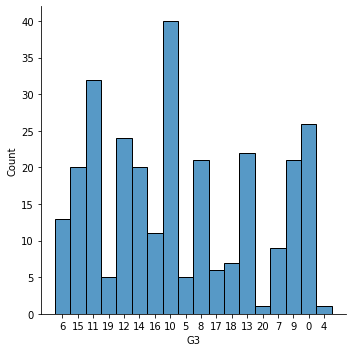

In [42]:
sns.displot(df['G3'])

La mayoria de los datos parecen estar un poco concentrados al medio, pero no se desprecia los demás, que estan en concentraciones parecidas.

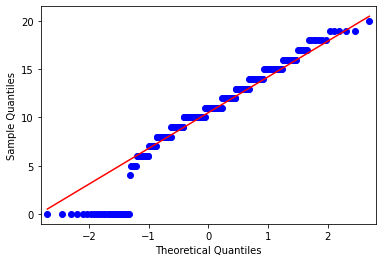

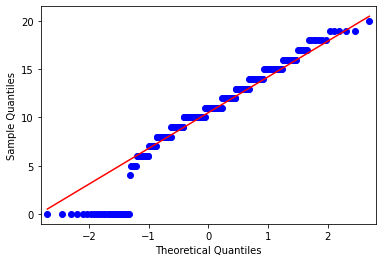

In [41]:
sm.qqplot(pd.to_numeric(df['G3'], downcast='float'),line='q')

Con el gráfico de normalidad Q-Q se puede observar que los valores iniciales escapan de los valores esperados. Pero se prefiere no hacer nada.

# Variables


 age
16    74
18    70
15    61
17    60
19    15
20     3
21     1
Name: age, dtype: int64
16    0.260563
18    0.246479
15    0.214789
17    0.211268
19    0.052817
20    0.010563
21    0.003521
Name: age, dtype: float64

 Medu
4    98
2    71
3    70
1    44
0     1
Name: Medu, dtype: int64
4    0.345070
2    0.250000
3    0.246479
1    0.154930
0    0.003521
Name: Medu, dtype: float64

 Fedu
2    77
3    76
4    68
1    62
0     1
Name: Fedu, dtype: int64
2    0.271127
3    0.267606
4    0.239437
1    0.218310
0    0.003521
Name: Fedu, dtype: float64

 traveltime
1    177
2     84
3     18
4      5
Name: traveltime, dtype: int64
1    0.623239
2    0.295775
3    0.063380
4    0.017606
Name: traveltime, dtype: float64

 studytime
2    139
1     75
3     51
4     19
Name: studytime, dtype: int64
2    0.489437
1    0.264085
3    0.179577
4    0.066901
Name: studytime, dtype: float64

 failures
0    223
1     37
2     14
3     10
Name: failures, dtype: int64
0    0.785211
1    0.130282

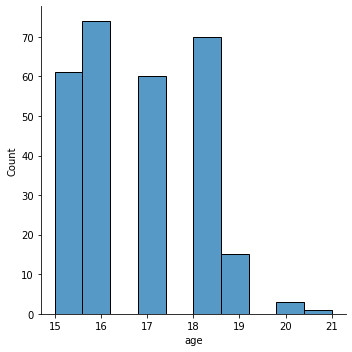

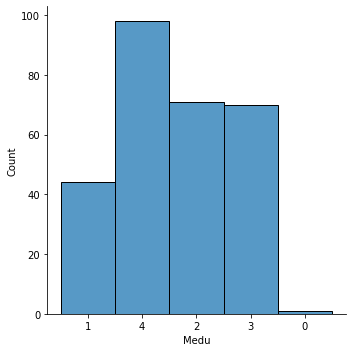

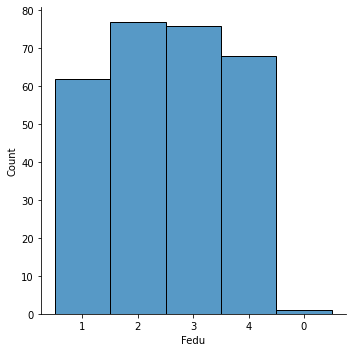

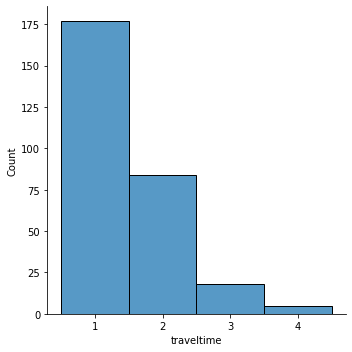

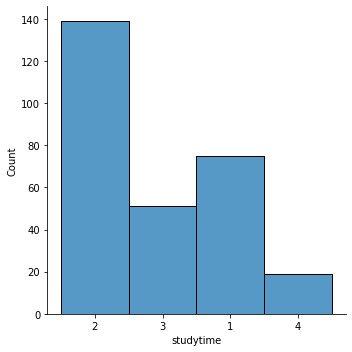

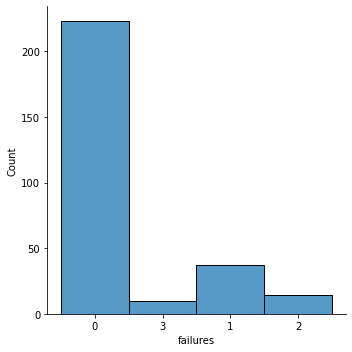

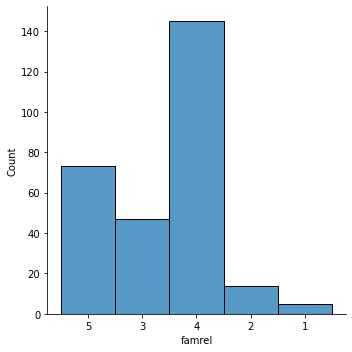

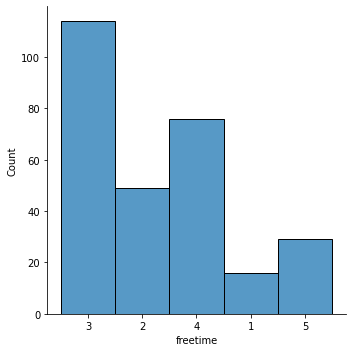

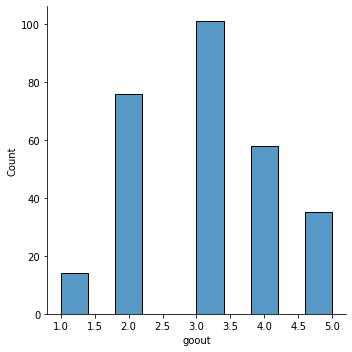

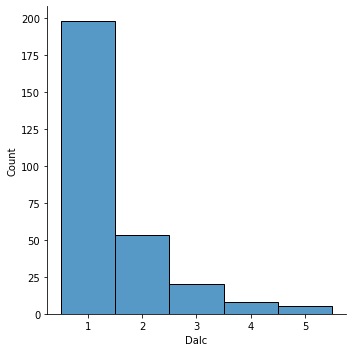

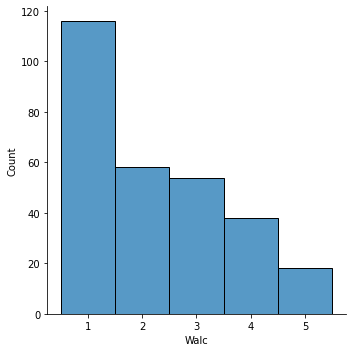

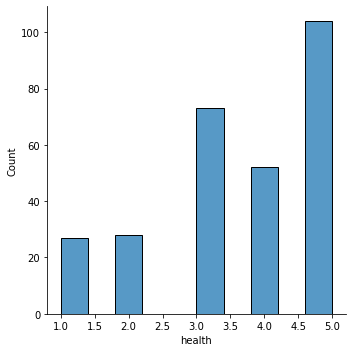

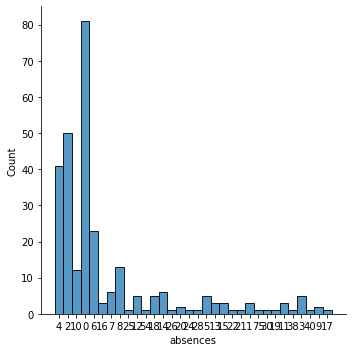

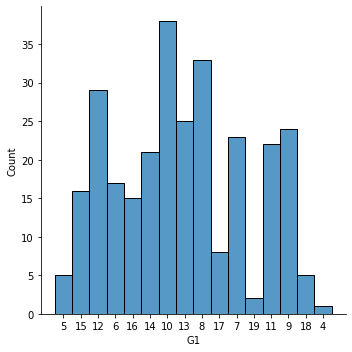

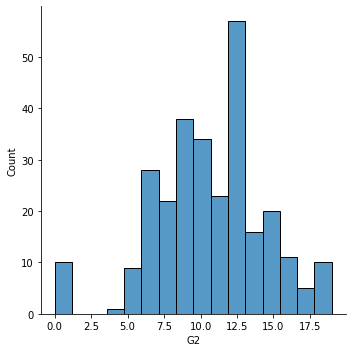

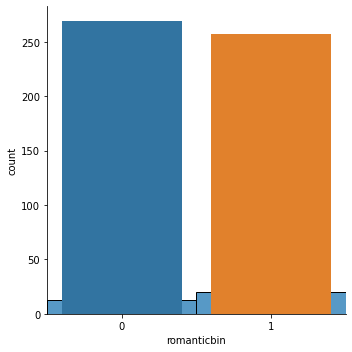

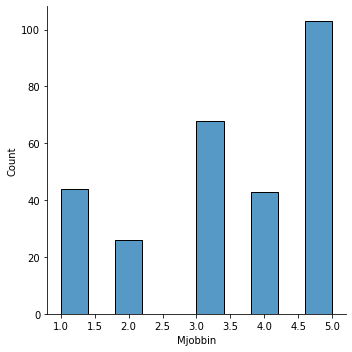

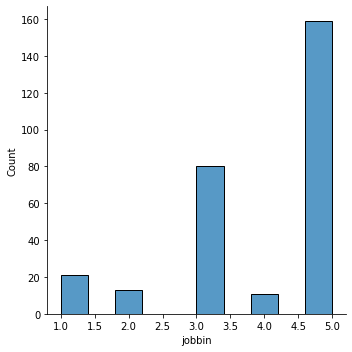

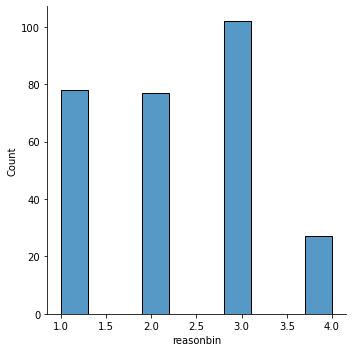

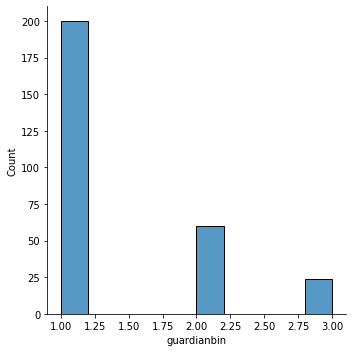

In [57]:
for index, value in enumerate(df):
    print("\n",value)
    print(df[value].value_counts())
    print((df[value].value_counts()/len(df[value])))
    if len(df[value].value_counts())==2:
        sns.countplot(df[value])
    # Si tiene varios valores, se hace un displot
    else:
        sns.displot(df[value])
    plt.tight_layout()

# Datos perdidos

In [59]:
perdida.sum()

130

Los datos perdidos representan el 0.9% por lo que se prefiere no hacer nada ya que es una perdida despreciable.